In [2]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

149245.0


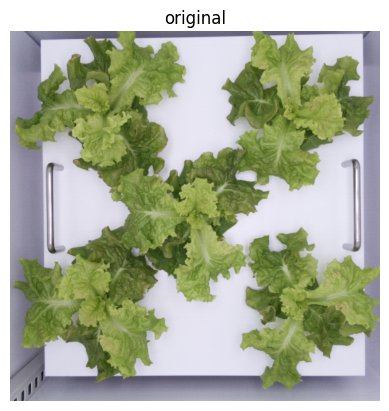

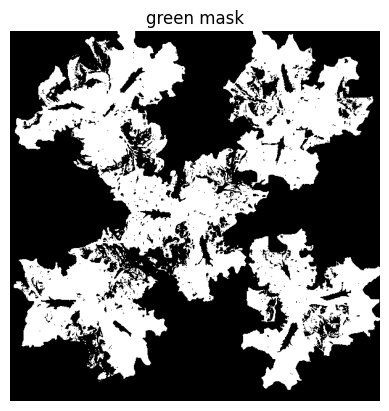

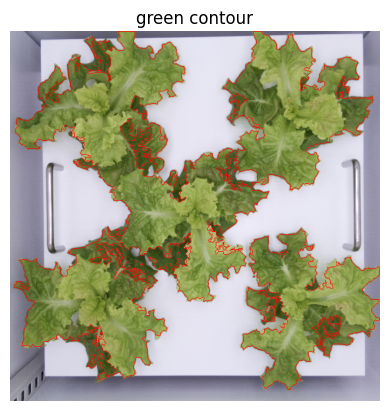

150117.5


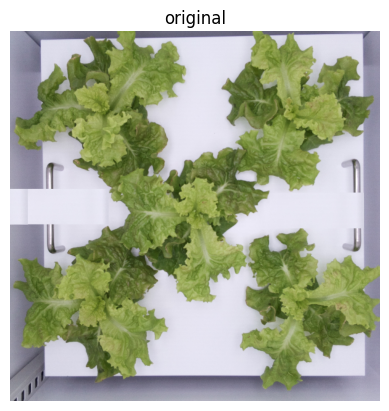

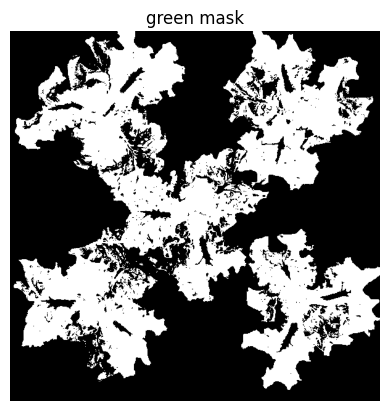

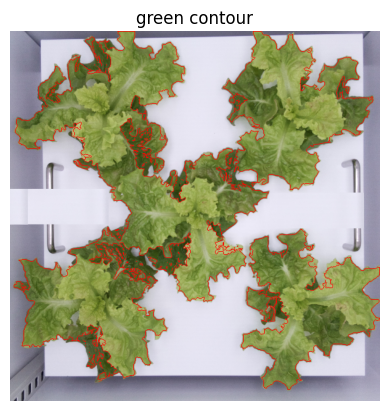

172664.5


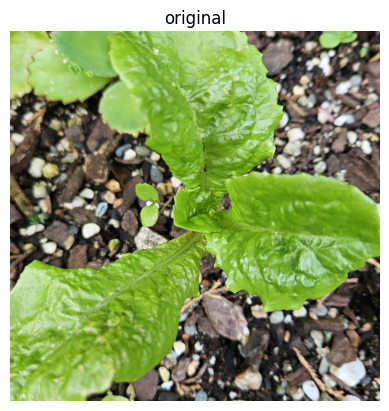

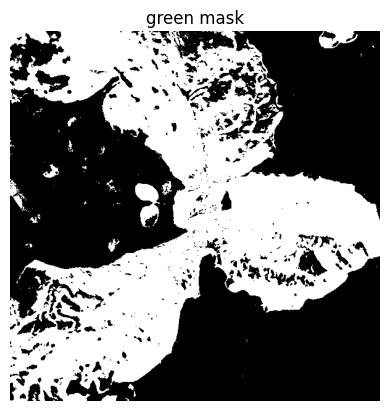

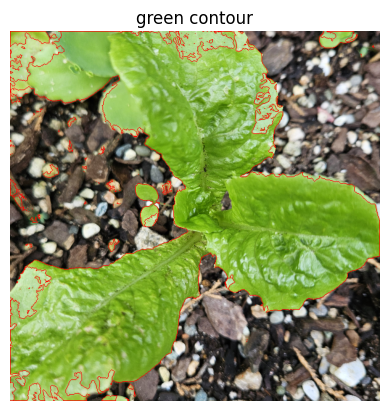

168661.5


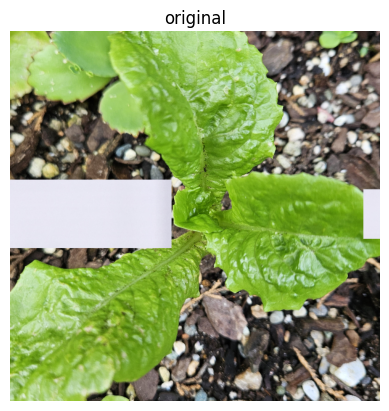

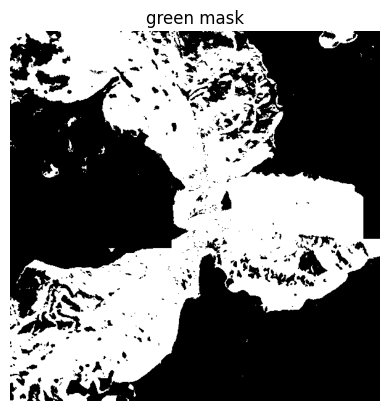

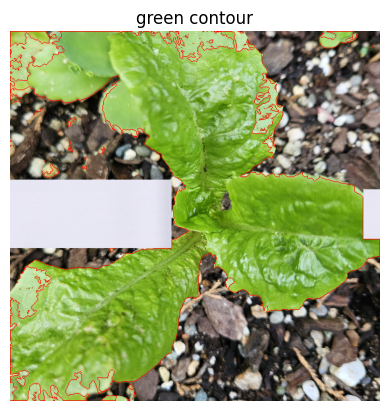

162652.0


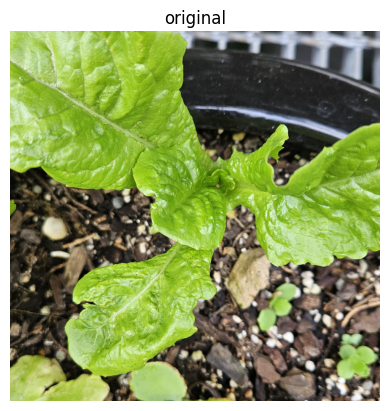

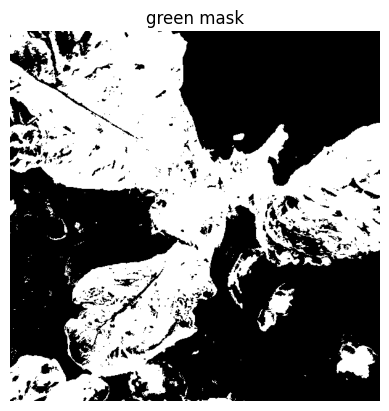

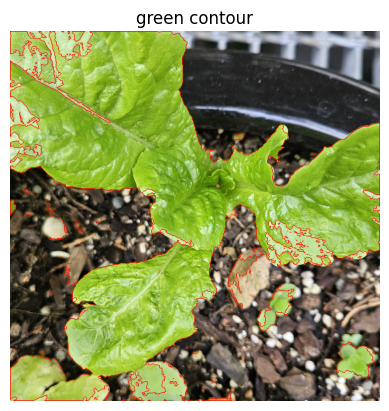

In [8]:
def crop_image(img, left, right, top, bottom):
    return img[top:-bottom, left:-right]

def get_crop_coordinates(width, height):
    if width == 3280 and height == 2464:
        return 440, 440, 32, 32
    elif width == 3000 and height == 4000:
        return 300, 300, 800, 800
    elif width == 4000 and height == 3000:
        return 800, 800, 300, 300
    else:
        raise ValueError(f"Unsupported image size: {width} x {height}.")

def process_and_show_image(image_path):
    img = cv2.imread(image_path)
    width, height = img.shape[1], img.shape[0]

    left_margin, right_margin, top_margin, bottom_margin = get_crop_coordinates(width, height)

    cropped_image = crop_image(img, left_margin, right_margin, top_margin, bottom_margin)

    # Resize
    desired_width = 600
    desired_height = 600
    cropped_image = cv2.resize(cropped_image, (desired_width, desired_height))

    # Convert to HSV
    resize = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2HSV)
    original = cropped_image.copy()  # 원본 이미지를 유지하기 위해 복사

    # Define a broader range of green color
    green_lower = np.array([20, 100, 100])
    green_upper = np.array([100, 255, 255])

    # Create mask for green color
    img_mask_green = cv2.inRange(resize, green_lower, green_upper)

    # Find contours on the green mask
    contours_green, _ = cv2.findContours(img_mask_green, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw green contours on the original image
    cv2.drawContours(original, contours_green, -1, (0, 0, 255), 1)

    # Calculate the area of green contours
    area_green = 0
    for k in range(0, len(contours_green)):
        area_green += cv2.contourArea(contours_green[k])
    print(area_green)

    # Display images
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.title('original')
    plt.axis('off')
    plt.show()

    plt.imshow(cv2.cvtColor(img_mask_green, cv2.COLOR_GRAY2RGB))
    plt.title('green mask')
    plt.axis('off')
    plt.show()

    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('green contour')
    plt.axis('off')
    plt.show()


img_path1 = r"../dataset/practice/before/Test1.png"
img_path2 = r"../dataset/practice/before/Test2.png"
img_path3 = r"../dataset/practice/before/Test3.jpg"
img_path4 = r"../dataset/practice/before/Test4.jpg"
img_path5 = r"../dataset/practice/before/Test5.jpg"

process_and_show_image(img_path1)
process_and_show_image(img_path2)
process_and_show_image(img_path3)
process_and_show_image(img_path4)
process_and_show_image(img_path5)

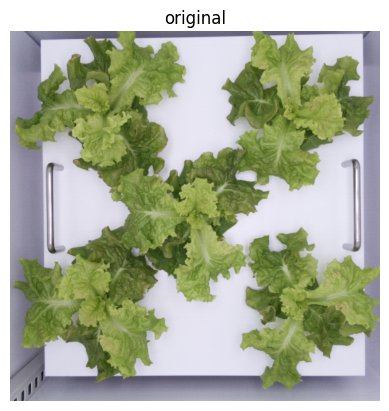

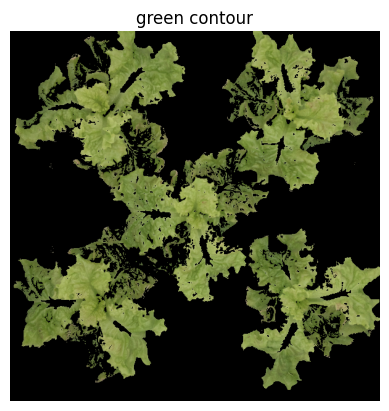

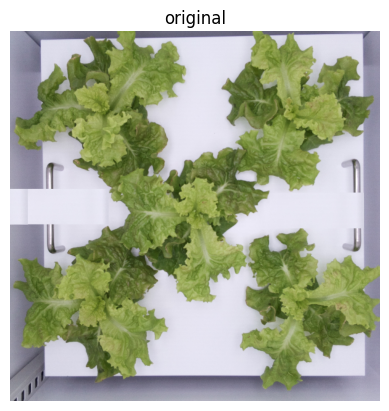

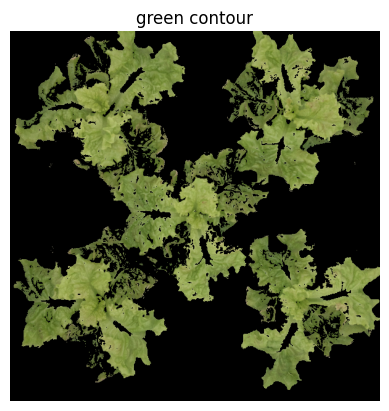

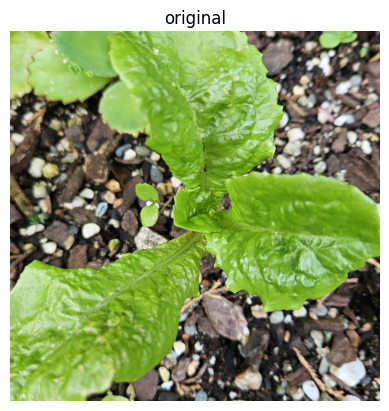

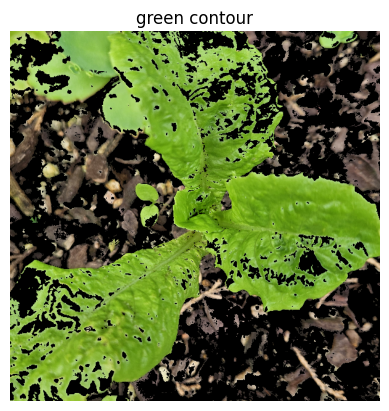

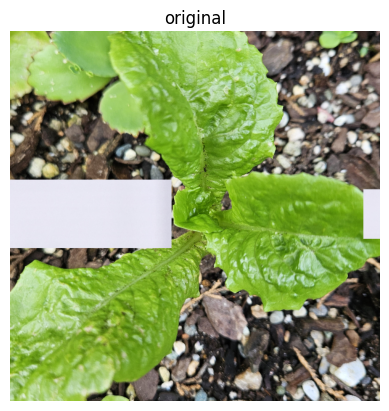

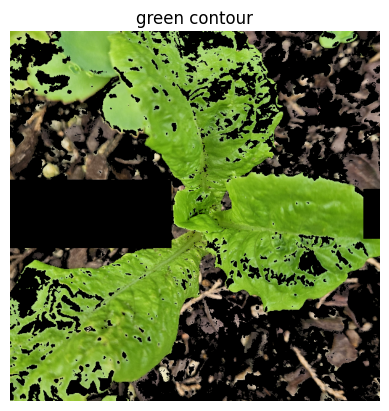

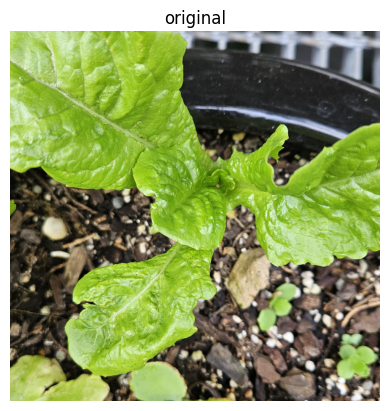

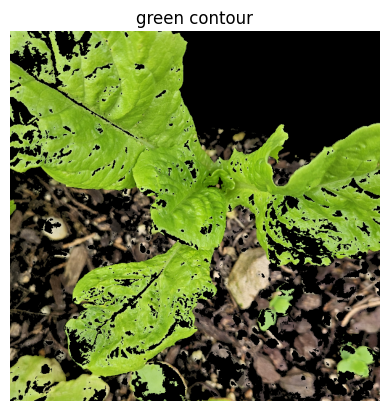

In [9]:
def crop_image(img, left, right, top, bottom):
    return img[top:-bottom, left:-right]

def get_crop_coordinates(width, height):
    if width == 3280 and height == 2464:
        return 440, 440, 32, 32
    elif width == 3000 and height == 4000:
        return 300, 300, 800, 800
    elif width == 4000 and height == 3000:
        return 800, 800, 300, 300
    else:
        raise ValueError(f"Unsupported image size: {width} x {height}.")

def process_and_show_image(image_path):
    img = cv2.imread(image_path)
    width, height = img.shape[1], img.shape[0]

    left_margin, right_margin, top_margin, bottom_margin = get_crop_coordinates(width, height)

    cropped_image = crop_image(img, left_margin, right_margin, top_margin, bottom_margin)

    # Resize
    desired_width = 600
    desired_height = 600
    cropped_image = cv2.resize(cropped_image, (desired_width, desired_height))

    # Convert to HSV
    resize = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2HSV)
    original = cropped_image.copy()  # 원본 이미지를 유지하기 위해 복사

    # Define a broader range for both green and red colors
    green_lower = np.array([20, 100, 100])
    green_upper = np.array([100, 255, 255])

    red_lower = np.array([0, 40, 40])
    red_upper = np.array([30, 255, 255])

    # Create masks for green and red colors
    img_mask_green = cv2.inRange(resize, green_lower, green_upper)
    img_mask_red = cv2.inRange(resize, red_lower, red_upper)

    # Combine green and red masks
    combined_mask = cv2.bitwise_or(img_mask_green, img_mask_red)

    # Extract only green and red colors
    result_combined = cv2.bitwise_and(original, original, mask=combined_mask)

    # Display images
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.title('original')
    plt.axis('off')
    plt.show()

    plt.imshow(cv2.cvtColor(result_combined, cv2.COLOR_BGR2RGB))
    plt.title('green contour')
    plt.axis('off')
    plt.show()


img_path1 = r"../dataset/practice/before/Test1.png"
img_path2 = r"../dataset/practice/before/Test2.png"
img_path3 = r"../dataset/practice/before/Test3.jpg"
img_path4 = r"../dataset/practice/before/Test4.jpg"
img_path5 = r"../dataset/practice/before/Test5.jpg"

process_and_show_image(img_path1)
process_and_show_image(img_path2)
process_and_show_image(img_path3)
process_and_show_image(img_path4)
process_and_show_image(img_path5)

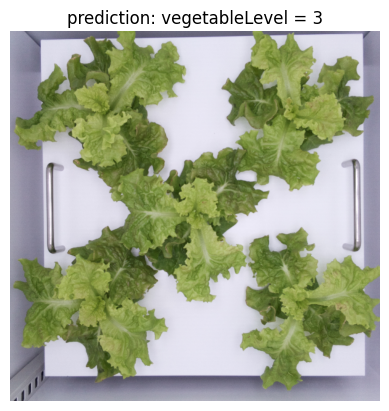

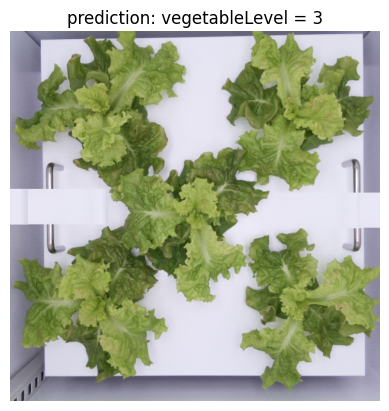

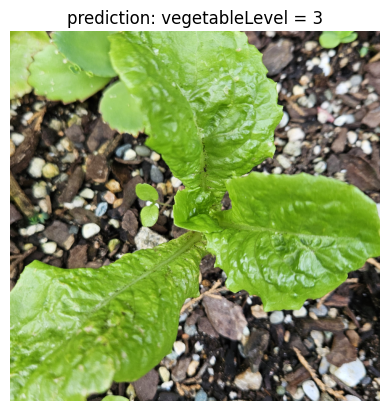

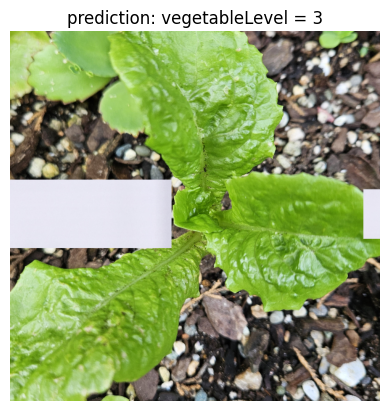

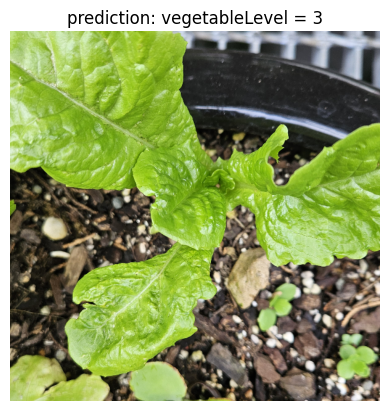

In [3]:
def crop_image(img, left, right, top, bottom):
    return img[top:-bottom, left:-right]

def get_crop_coordinates(width, height):
    if width == 3280 and height == 2464:
        return 440, 440, 32, 32
    elif width == 3000 and height == 4000:
        return 300, 300, 800, 800
    elif width == 4000 and height == 3000:
        return 800, 800, 300, 300
    else:
        raise ValueError(f"Unsupported image size: {width} x {height}.")

def process_and_show_image(image_path):
    img = cv2.imread(image_path)
    width, height = img.shape[1], img.shape[0]

    left_margin, right_margin, top_margin, bottom_margin = get_crop_coordinates(width, height)

    cropped_image = crop_image(img, left_margin, right_margin, top_margin, bottom_margin)

    # Resize
    desired_width = 600
    desired_height = 600
    cropped_image = cv2.resize(cropped_image, (desired_width, desired_height))

    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.title('prediction: vegetableLevel = 3')
    plt.axis('off')
    plt.show()


img_path1 = r"../dataset/practice/before/Test1.png"
img_path2 = r"../dataset/practice/before/Test2.png"
img_path3 = r"../dataset/practice/before/Test3.jpg"
img_path4 = r"../dataset/practice/before/Test4.jpg"
img_path5 = r"../dataset/practice/before/Test5.jpg"

process_and_show_image(img_path1)
process_and_show_image(img_path2)
process_and_show_image(img_path3)
process_and_show_image(img_path4)
process_and_show_image(img_path5)